In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Arun\Downloads\salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
141561,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
141562,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
141563,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
141564,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [2]:
df.drop(columns=["salary","salary_currency"],inplace=True)

In [3]:
from ydata_profiling import ProfileReport
rep=ProfileReport(df,explorative=True)
rep.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 15.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df=pd.get_dummies(df,columns=["experience_level","employment_type","job_title","employee_residence","remote_ratio","company_location","company_size"])


In [5]:
x=df.drop("salary_in_usd",axis=1)
y=df["salary_in_usd"]
print(y.shape)
y=y.values.reshape(-1,1)


(141566,)


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
print(x.shape)

(141566, 624)


In [10]:
model=Sequential()
model.add(Dense(128,activation="relu",input_dim=624))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation = "linear"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               80000     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [12]:
callback=EarlyStopping(
    monitor="val_loss",
    patience= 3,
    verbose=1,
    mode="auto",
    restore_best_weights=1
)

In [13]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mae"])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [16]:
hist=model.fit(x_train,y_train,epochs=500,validation_split=0.2,callbacks=callback,batch_size=768)

Epoch 1/500
118/118 [==============================] - 1s 7ms/step - loss: 0.8326 - mae: 0.6795 - val_loss: 0.7553 - val_mae: 0.6494
Epoch 2/500
118/118 [==============================] - 1s 6ms/step - loss: 0.8235 - mae: 0.6754 - val_loss: 0.7501 - val_mae: 0.6482
Epoch 3/500
118/118 [==============================] - 1s 5ms/step - loss: 0.8194 - mae: 0.6724 - val_loss: 0.7454 - val_mae: 0.6460
Epoch 4/500
118/118 [==============================] - 1s 5ms/step - loss: 0.8161 - mae: 0.6718 - val_loss: 0.7496 - val_mae: 0.6478
Epoch 5/500
118/118 [==============================] - 1s 5ms/step - loss: 0.8117 - mae: 0.6702 - val_loss: 0.7460 - val_mae: 0.6463
Epoch 6/500
118/118 [==============================] - 1s 5ms/step - loss: 0.8076 - mae: 0.6665 - val_loss: 0.7450 - val_mae: 0.6464
Epoch 7/500
118/118 [==============================] - 1s 5ms/step - loss: 0.8050 - mae: 0.6664 - val_loss: 0.7423 - val_mae: 0.6447
Epoch 8/500
118/118 [==============================] - 1s 5ms/step - 

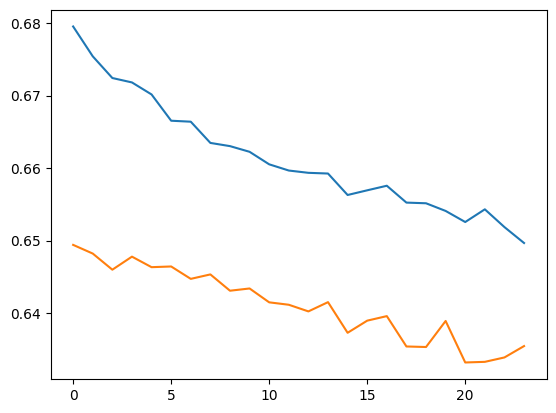

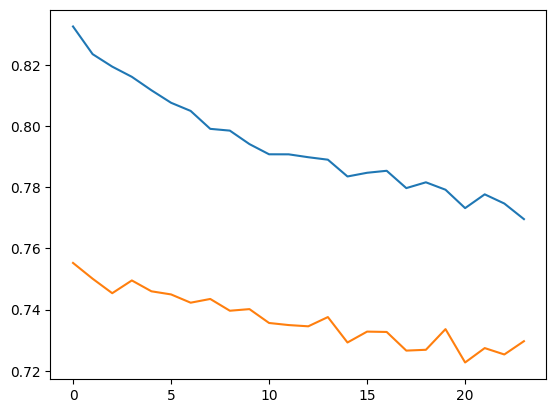

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history["mae"],label="mae")
plt.plot(hist.history["val_mae"],label="val_mae")
plt.show()
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="val_loss")
plt.show()

In [22]:
pred=model.predict(x_test)

885/885 [==============================] - 1s 1ms/step


In [23]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.25531863763546137


In [24]:
from catboost import CatBoostRegressor
new=CatBoostRegressor(task_type="GPU",devices="0")
new.fit(x_train,y_train)
newpred=new.predict(x_test)

Learning rate set to 0.075057
0:	learn: 0.9844765	total: 103ms	remaining: 1m 43s
1:	learn: 0.9716143	total: 111ms	remaining: 55.2s
2:	learn: 0.9605634	total: 116ms	remaining: 38.5s
3:	learn: 0.9508204	total: 122ms	remaining: 30.3s
4:	learn: 0.9423538	total: 126ms	remaining: 25.2s
5:	learn: 0.9347872	total: 131ms	remaining: 21.8s
6:	learn: 0.9282486	total: 136ms	remaining: 19.3s
7:	learn: 0.9226306	total: 140ms	remaining: 17.4s
8:	learn: 0.9173184	total: 144ms	remaining: 15.9s
9:	learn: 0.9127376	total: 149ms	remaining: 14.7s
10:	learn: 0.9086397	total: 153ms	remaining: 13.8s
11:	learn: 0.9051428	total: 157ms	remaining: 13s
12:	learn: 0.9018918	total: 162ms	remaining: 12.3s
13:	learn: 0.8988487	total: 166ms	remaining: 11.7s
14:	learn: 0.8960680	total: 170ms	remaining: 11.2s
15:	learn: 0.8936292	total: 175ms	remaining: 10.8s
16:	learn: 0.8913761	total: 179ms	remaining: 10.3s
17:	learn: 0.8892020	total: 184ms	remaining: 10s
18:	learn: 0.8870334	total: 188ms	remaining: 9.7s
19:	learn: 0.88

In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_test,newpred))

0.305960976764464
